<a href="https://colab.research.google.com/github/nalinsin/LearningSparkV2/blob/master/The_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Notebook**

### Let's mount the google drive 

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [6]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 30 kB/s 
     |████████████████████████████████| 198 kB 52.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=3f0e3da7f5030a34efbe86805ebf8fe4de12aa0c65e34eb09641ea55489a5a8f
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


Importing the modules 

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plts

creating spark session

In [10]:
spark = SparkSession.builder.appName('colab_notebook').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [8]:
#filee='C:\Users\barclays\Downloads\genre.csv'
#filee='C:/Users/barclays/Downloads/genre.csv'
listening_df = spark.read.format("csv").options(inferSchema='True',header='True').load("/content/drive/MyDrive/dataset/listenings.csv")

let's check the data:

In [9]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [10]:
listening_df = listening_df.drop("date")

drop the null rows:

In [11]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [12]:
listening_df.count()

13758905

let's see the schema: 

In [13]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [14]:
listening_df.cache()

DataFrame[user_id: string, track: string, artist: string, album: string]

# Task 3:

**Query #0:**
select two columns: track and artist

In [15]:
listening_df.select('track','artist').show()

+--------------------+---------------+
|               track|         artist|
+--------------------+---------------+
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
|               Rhino|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [16]:
listening_df.select('*').filter(col('artist')=='Rihanna').show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [17]:
listening_df.select('user_id').filter(col('artist')=='Rihanna').groupBy('user_id').agg(count('*').alias('counnt')).orderBy(desc('counnt')).limit(10).show()

+---------------+------+
|        user_id|counnt|
+---------------+------+
|        thiessu|   179|
|    eyessetkyle|   166|
|           adxx|   164|
|missnumberthree|   156|
|helloiamnatalie|   128|
|          nmjnb|   124|
|        AndyyyA|   123|
|     BIGBANG186|   121|
|     mixedvibes|   120|
|       AndyKitt|   115|
+---------------+------+



**Query #3:**

find top 10 famous tracks 

In [18]:
listening_df.select('track').groupBy('track').agg(count('*').alias('counnt')).orderBy(desc('counnt')).limit(10).show()

+-------+------+
|  track|counnt|
+-------+------+
|  Intro| 13176|
|   Home|  7576|
|  Hello|  6961|
|Hold On|  5857|
|   Work|  4889|
|  Sorry|  4824|
|   Baby|  4646|
|Runaway|  4429|
| Closer|  4287|
|   Fire|  4141|
+-------+------+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [19]:
listening_df.select('track').filter(col('artist')=='Rihanna').groupBy('track').agg(count('*').alias('counnt')).orderBy(desc('counnt')).limit(10).show()

+--------------------+------+
|               track|counnt|
+--------------------+------+
|                Work|  2646|
|Only Girl (In the...|  1749|
|We Found Love (fe...|  1575|
|                 S&M|  1307|
|            Rude Boy|  1303|
|            Diamonds|  1224|
|      Kiss it Better|   945|
| Where Have You Been|   844|
|Cheers (Drink to ...|   697|
|           Desperado|   679|
+--------------------+------+



**Query #5:**

find top 10 famous albums 

In [20]:
listening_df.select('album').groupBy('album').agg(count('*').alias('counnt')).orderBy(desc('counnt')).limit(10).show()

+--------------------+------+
|               album|counnt|
+--------------------+------+
|       Greatest Hits| 67892|
|   The Life Of Pablo| 22311|
|                  AM| 14264|
|                  xx| 14198|
|     An Awesome Wave| 13673|
|        Sigh No More| 13556|
|Whatever People S...| 12731|
|            For Emma| 11995|
|          Art Angels| 11694|
|                  21| 11576|
+--------------------+------+



# Task 4 :
importing the ***genre.csv*** file:

In [11]:
genre_df=spark.read.format('csv').options(inferSchema='True', header='True').load("/content/drive/MyDrive/dataset/genre.csv")

let's check the data

In [22]:
genre_df.show()
genre_df.cache()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



DataFrame[artist: string, genre: string]

Let's inner join these two data frames

In [23]:
datum_df = listening_df.join(genre_df, how='inner', on='artist')
datum_df.cache()
datum_df.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [24]:
datum_df.select('user_id').filter(col('genre')=='pop').groupBy('user_id').agg(count('*').alias('cnt')).orderBy(desc('cnt')).limit(10).show()

+---------------+---+
|        user_id|cnt|
+---------------+---+
|        01Green|496|
|      momousagi|400|
|          mrpsb|400|
|   BlueKnockOut|378|
|    musicboy80s|376|
|  incultojurgis|374|
| ElektricOrchid|370|
|foreign_fanatic|350|
|   Kevin_Soutar|346|
|  landrover2171|301|
+---------------+---+



**Query #7**

find top 10 famous genres

In [25]:
datum_df.select('genre').groupBy('genre').agg(count('*').alias('cnt')).orderBy(desc('cnt')).limit(10).show()

+----------+-------+
|     genre|    cnt|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [31]:
q8_1=datum_df.select('user_id','genre').groupBy('user_id','genre').agg(count('*').alias('cnt')).orderBy('user_id',desc('cnt'))
q8_1.show(5)

+-------+----------+---+
|user_id|     genre|cnt|
+-------+----------+---+
| --Seph| classical| 31|
| --Seph|      rock| 27|
| --Seph|indie rock| 15|
| --Seph|     opera| 12|
| --Seph|      folk| 10|
+-------+----------+---+
only showing top 5 rows



In [36]:
q8_2=q8_1.groupBy('user_id').agg(max(struct(col('cnt'),col('genre'))).alias('max')).select('user_id','max.genre').orderBy('user_id')
q8_2.show(5,truncate=False)

+------------+----------+
|user_id     |genre     |
+------------+----------+
|--Seph      |classical |
|--Shinn--   |rock      |
|--ladyluck--|soundtrack|
|--mopsi--   |electronic|
|--ollz--    |rock      |
+------------+----------+
only showing top 5 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [12]:
q9=genre_df.select('genre').filter((col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='metal') | (col('genre')=='hip hop')).groupBy('genre').agg(count('*').alias('cnt'))
q9.show()

+-------+----+
|  genre| cnt|
+-------+----+
|    pop|6960|
|hip hop|4288|
|  metal|1854|
|   rock|9066|
+-------+----+



Now, let's visualize the results using ***matplotlib***

In [13]:
q9_list = q9.collect()

In [16]:
labels = [rw['genre'] for rw in q9_list]
counts = [row['cnt'] for row in q9_list]

In [17]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

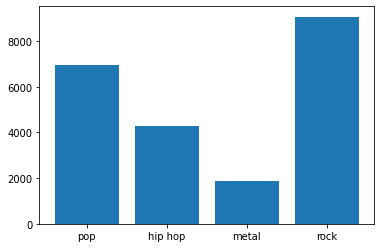

In [18]:
plts.bar(labels,counts)